In [113]:
import cv2
import matplotlib.pyplot as plt
import numpy as np
import math
from scipy.interpolate import RegularGridInterpolator


In [114]:
def box3d(n):
    x_left_right = np.linspace(-0.5,0.5,n)
    y_left = -0.5 * np.ones(n)
    y_right = 0.5 * np.ones(n)
    z_bottom = -0.5 * np.ones(n)
    z_up = 0.5 * np.ones(n)
    left_right_surf = np.vstack((np.concatenate((x_left_right, x_left_right, x_left_right, x_left_right)), np.concatenate((y_left,y_left, y_right, y_right)), np.concatenate((z_bottom, z_up, z_bottom, z_up))))
    
    x_front = -0.5 * np.ones(n)
    x_back = 0.5 * np.ones(n)
    y_front_back = np.linspace(-0.5, 0.5, n)
    front_back_surf = np.vstack((np.concatenate((x_front, x_front, x_back, x_back)), np.concatenate((y_front_back, y_front_back, y_front_back, y_front_back)), np.concatenate((z_bottom, z_up, z_bottom, z_up))))
    
    z_bottom2top = np.linspace(-0.5,0.5,n)
    around = np.vstack((np.concatenate((x_front, x_front, x_back, x_back)), np.concatenate((y_left, y_right, y_right, y_left)), np.concatenate((z_bottom2top, z_bottom2top, z_bottom2top, z_bottom2top))))
    
    x_center = np.zeros(n)
    y_center = np.linspace(-0.5,0.5,n)
    y_center1 = np.zeros(n)
    z_center = np.zeros(n)
    center = np.vstack((np.concatenate((x_center, x_left_right, x_center)), np.concatenate((y_center, y_center1, y_center1)), np.concatenate((z_center, z_center, z_bottom2top))))
    
    return np.hstack((left_right_surf, front_back_surf, around, center))

In [115]:
def projection(K, R, T, Q):
    Projection_M = K @ (np.hstack((R, T)))
    q = Projection_M @ Q
    return q

In [116]:
def projection_dist(K, R, T, Q, dist):
    Q = np.vstack((Q, np.ones((1,Q.shape[1]))))
    p = np.hstack((R,T)) @ Q
    p = p[:-1]/p[-1]
    r = np.sqrt((p**2)[0] + (p**2)[1])
    dist_p = p * (1 + dist[0]*(r ** 2) +  dist[1]*(r ** 4) + dist[2]*(r ** 6))
    q = K @ np.vstack((dist_p, np.ones((1, dist_p.shape[1]))))
    return q

In [117]:
def undisortImage(image, R, T, dist):
    h,w,c = image.shape
    f = 0.455732 * w
    K = np.array([ [int(f), 0, 0.5*w], [0, int(f), 0.5*h], [0, 0, 1] ])
    Q = image[:,:,0]
    

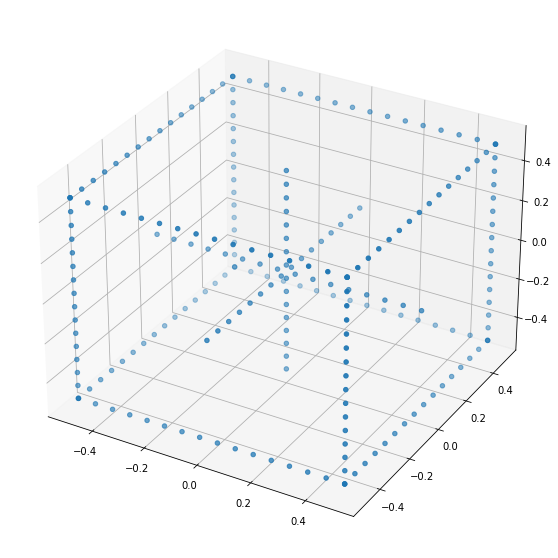

In [118]:
x,y,z = box3d(16)
plt.figure(figsize=(10,10))
ThreeD_img = plt.axes(projection = '3d')
ThreeD_img.scatter3D(x,y,z)
plt.show()

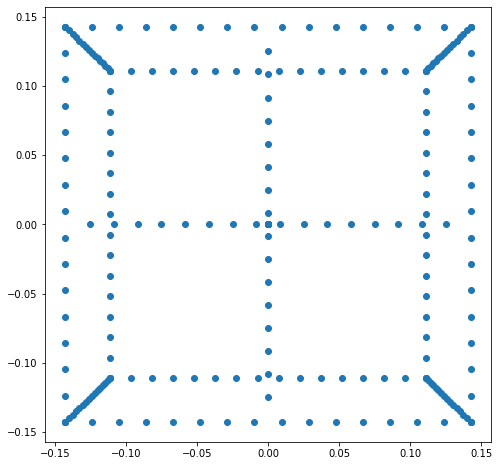

In [119]:
K = np.array([[1,0,0], [0,1,0], [0,0,1]])
R = np.array([[1,0,0], [0,1,0], [0,0,1]])
T = np.array([[0],[0],[4]])
Q = box3d(16)
Q = np.vstack((Q, np.ones((1,Q.shape[1]))))
q = projection(K,R,T,Q)
q = q[:-1]/q[-1]
plt.figure(figsize=(8,8))
plt.scatter(q[0,:], q[1,:])

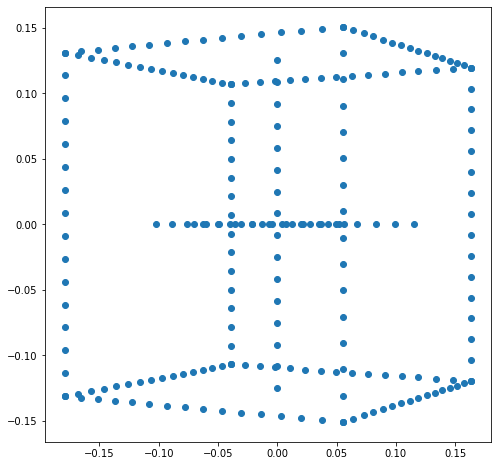

In [120]:
K = np.array([[1,0,0], [0,1,0], [0,0,1]])
R = np.array([[np.cos(30/180 * np.pi),0,np.sin(30/180 * np.pi)], [0,1,0], [-np.sin(30/180 * np.pi),0,np.cos(30/180 * np.pi)]])
T = np.array([[0],[0],[4]])
Q = box3d(16)
Q = np.vstack((Q, np.ones((1,Q.shape[1]))))
q = projection(K,R,T,Q)
q = q[:-1]/q[-1]
plt.figure(figsize=(8,8))
plt.scatter(q[0,:], q[1,:])


# Ex 2

(0.0, 800.0)

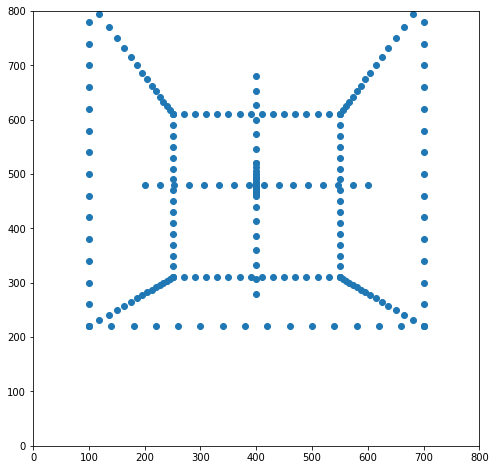

In [121]:
## Ex 2.1
K = np.array([[600,0,400], [0,600,400], [0,0,1]])
R = np.array([[1,0,0], [0,1,0], [0,0,1]])
T = np.array([[0],[0.2],[1.5]])
Q = box3d(16)
Q = np.vstack((Q, np.ones((1,Q.shape[1]))))
q = projection(K,R,T,Q)
q = q[:-1]/q[-1]
plt.figure(figsize=(8,8))
plt.scatter(q[0,:], q[1,:])
plt.xlim(0, 800)
plt.ylim(0, 800)

In [122]:
K = np.array([[600,0,400], [0,600,400], [0,0,1]])
R = np.array([[1,0,0], [0,1,0], [0,0,1]])
T = np.array([[0],[0.2],[1.5]])
Q = np.array([[-0.5], [-0.5], [-0.5]])
Q = np.vstack((Q, 1))
q = projection(K,R,T,Q)
q = q[:-1]/q[-1]
print('Projection of P:\n', q)

Projection of P:
 [[100.]
 [220.]]


(0.0, 800.0)

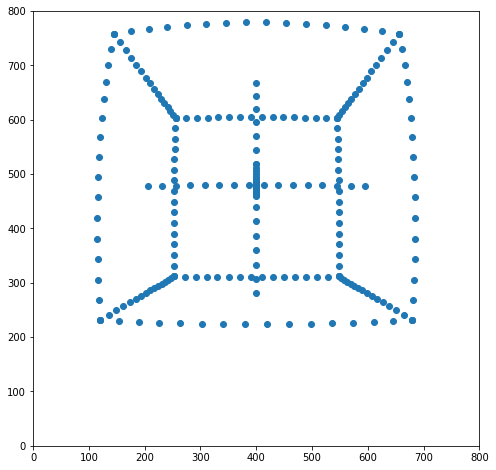

In [123]:
## Ex 2.2
K = np.array([[600,0,400], [0,600,400], [0,0,1]])
R = np.array([[1,0,0], [0,1,0], [0,0,1]])
T = np.array([[0],[0.2],[1.5]])
Q = box3d(16)
dist = [-0.2, 0, 0]
q = projection_dist(K,R,T,Q,dist)
q = q[:-1]/q[-1]
plt.figure(figsize=(8,8))
plt.scatter(q[0,:], q[1,:])
plt.xlim(0, 800)
plt.ylim(0, 800)

In [124]:
K = np.array([[600,0,400], [0,600,400], [0,0,1]])
R = np.array([[1,0,0], [0,1,0], [0,0,1]])
T = np.array([[0],[0.2],[1.5]])
Q = np.array([[-0.5], [-0.5], [-0.5]])
dist = [-0.2, 0, 0]
q = projection_dist(K,R,T,Q,dist)
q = q[:-1]/q[-1]
print('Projection of P:\n', q)

Projection of P:
 [[120.4 ]
 [232.24]]


(0.0, 800.0)

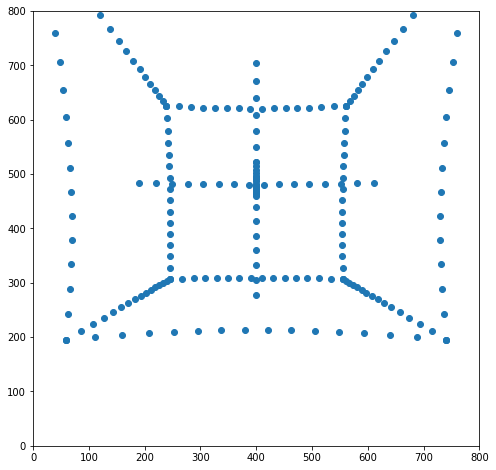

In [125]:
K = np.array([[600,0,400], [0,600,400], [0,0,1]])
R = np.array([[1,0,0], [0,1,0], [0,0,1]])
T = np.array([[0],[0.2],[1.5]])
Q = box3d(16)
dist =[0.4, 0, 0]
q = projection_dist(K,R,T,Q,dist)
q = q[:-1]/q[-1]
plt.figure(figsize=(8,8))
plt.scatter(q[0,:], q[1,:])
plt.xlim(0, 800)
plt.ylim(0, 800)

In [126]:
K = np.array([[600,0,400], [0,600,400], [0,0,1]])
R = np.array([[1,0,0], [0,1,0], [0,0,1]])
T = np.array([[0],[0.2],[1.5]])
Q = np.array([[-0.5], [-0.5], [-0.5]])
dist =[0.4, 0, 0]
q = projection_dist(K,R,T,Q,dist)
q = q[:-1]/q[-1]
print('Projection of P:\n', q)

Projection of P:
 [[ 59.2 ]
 [195.52]]


In [15]:
## Ex 2.3
image = cv2.imread('gopro_robot.jpeg')
h,w,c = image.shape
f = 0.455732 * w
K = np.array([ [int(f), 0, 0.5*w], [0, int(f), 0.5*h], [0, 0, 1] ])
print('Intrinsic Matrix:\n', K)

Intrinsic Matrix:
 [[875.   0. 960.]
 [  0. 875. 540.]
 [  0.   0.   1.]]


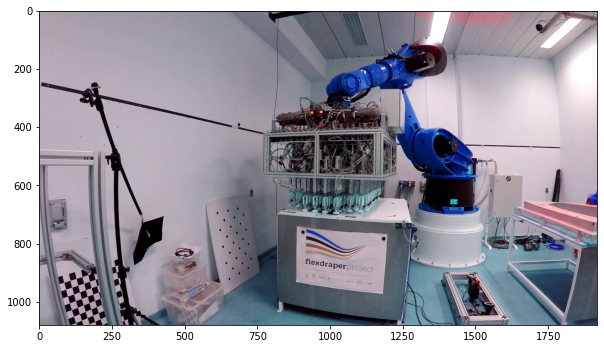

In [23]:
plt.figure(figsize=(10,10))
plt.imshow(image)

In [44]:
def undistortImage(image, K, dist):
    (height, width,d) = image.shape
    x, y = np.meshgrid(np.linspace(0,width-1,width), np.linspace(0,height-1,height))
    x = x.flatten()
    y = y.flatten()
    origin = np.vstack((x,y))    
    originh = np.vstack((origin,np.ones(len(origin[0]))))
    Kinv = np.linalg.inv(K)
    p = Kinv@originh  
    q = projection_dist1(K, p, dist)
    q = q[:-1]/q[-1]
    
    
    row = np.linspace(0, height-1, height, dtype=int)
    column = np.linspace(0, width-1, width, dtype=int)
    xg, yg = np.meshgrid(row, column, indexing='ij', sparse=True)
    def get_intensity(x, y):
        return image[x,y,:]
    Intensity = get_intensity(xg, yg)
    my_interpolating_function = RegularGridInterpolator((row, column), Intensity)


    undistort = np.zeros(shape = (height,width))  #find the origin coordinate corrsponding tensity from image
    undistort = undistort.tolist()

    
    
    for i in range(height):
        for j in range(width):
            row = int(q[1][i*width+j])
            col = int(q[0][i*width+j])
            color = my_interpolating_function(np.array([row, col])).flatten()
            undistort[i][j] = np.array([int(color[0]), int(color[1]), int(color[2])])
    
    return undistort

  
    
def projection_dist1(K, p, dist):
    p = p[:-1]/p[-1]
    r = np.sqrt((p**2)[0] + (p**2)[1])
    dist_p = p * (1 + dist[0]*(r ** 2) +  dist[1]*(r ** 4) + dist[2]*(r ** 6))
    q = K @ np.vstack((dist_p, np.ones((1, dist_p.shape[1]))))
    return q

In [ ]:
#coeff =[-0.245031, 0.071524, -0.00994978]
#img = undistortImage(image.copy(), K, coeff)
plt.figure(figsize=(10,10))
plt.imshow(img)

In [16]:
def undistortImage(image, K, dist):
    (height, width,d) = image.shape
    x, y = np.meshgrid(np.linspace(0,width-1,width), np.linspace(0,height-1,height))
    x = x.flatten()
    y = y.flatten()
    origin = np.vstack((x,y))    
    originh = np.vstack((origin,np.ones(len(origin[0]))))
    Kinv = np.linalg.inv(K)
    p = Kinv@originh  
    q = projection_dist1(K, p, dist)
    q = q[:-1]/q[-1]
    
    undistort = np.zeros(shape = (height,width))  #find the origin coordinate corrsponding tensity from image
    undistort = undistort.tolist()
    for i in range(height):
        for j in range(width):
            row = int(q[1][i*width+j])
            col = int(q[0][i*width+j])

            undistort[i][j] = list(image[row][col])
    
    return undistort

  
    
def projection_dist1(K, p, dist):
    p = p[:-1]/p[-1]
    r = np.sqrt((p**2)[0] + (p**2)[1])
    dist_p = p * (1 + dist[0]*(r ** 2) +  dist[1]*(r ** 4) + dist[2]*(r ** 6))
    q = K @ np.vstack((dist_p, np.ones((1, dist_p.shape[1]))))
    return q


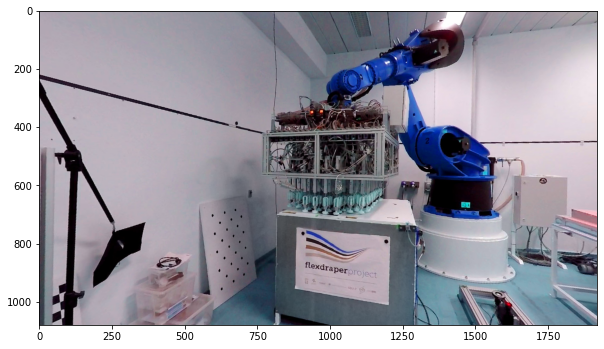

In [20]:
coeff =[-0.245031, 0.071524, -0.00994978]
img = undistortImage(image.copy(), K, coeff)
plt.figure(figsize=(10,10))
plt.imshow(img)

In [43]:
## Ex 2.5
dict1 = {'p1': np.array([ [1], [1]]), 'p2': np.array([[0], [3]]), 'p3': np.array([[2], [3]]), 'p4': np.array([ [2], [4]])}
H = np.array([ [-2, 0, 1], [1, -2, 0], [0, 0, 3]])
P = list()
for p, mat in dict1.items():
    mat1 = np.vstack((mat, np.ones((1, 1))))
    P_map = H @ mat1
    P.append(P_map)
P = np.array(P).reshape(-1,3).T
P = P[:-1]/P[-1]
for p in P:
    print(p)

[-0.33333333  0.33333333 -1.         -1.        ]
[-0.33333333 -2.         -1.33333333 -2.        ]


In [44]:
## Ex 2.6
def hest(q, q_Hom):
    B = []
    for i,j in zip(q_Hom,q):
        q_2 = np.hstack((j, 1))
        q1_mat = np.array([ [0, -1, i[1]], [1, 0, -i[0]], [-i[1], i[0], 0]], dtype = 'float32') 
        b = np.kron(q_2, q1_mat)
        B.append(b)  
    B = np.array(B).reshape(-1,9)
    U,S,V = np.linalg.svd(B)
    H = V[-1,:]
    H = H.reshape(3,3).T
    return(H)

In [112]:
q2 = np.array( [ [1, 1], [0, 3], [2, 3], [2, 4]], dtype = 'float32')
q1 = np.array( [ [-1/3, -1/3], [1/3, -2], [-1, -4/3], [-1, -2] ], dtype = 'float32')
H = hest(q2, q1)
print('H:\n', H)

##verify
q1 = H @ np.hstack((q2, np.ones((q2.shape[0], 1)))).T
q1 = q1[:-1]/q1[-1]
print('verify Points:\n', q1)

H:
 [[ 4.58831495e-01  5.38423369e-09 -2.29415756e-01]
 [-2.29415684e-01  4.58831484e-01 -5.48679051e-08]
 [-2.61519917e-08 -5.38423375e-09 -6.88247182e-01]]
verify Points:
 [[-0.33333334  0.33333334 -1.         -1.        ]
 [-0.33333334 -2.         -1.33333337 -2.        ]]


In [46]:
## Ex 2.7
def normalize2d(p):
    '''
    Normalize = (x-mean)/std
    '''
    X = p[:,0]
    Y = p[:,1]
    T = np.array([ [1/X.std(), 0, -X.mean()/X.std()], [0, 1/Y.std(), -Y.mean()/Y.std()], [0, 0, 1] ])
    q = T @ p.T
    return T, q

In [47]:
q2 = np.array( [ [1,1], [0, 3], [2, 3], [2, 4]], dtype = 'float32')
q2 = np.hstack((q2, np.ones((4,1))))
T, p = normalize2d(q2)

print('Mean: [{}, {}]\nStd: [{}, {}]'.format(p[0,:].mean(), p[1,:].mean(), p[0,:].std(), p[1,:].std()))
print('Normalization Matrix:\n', T)
print('Original Points:\n', q2.T)
print('Normalized Points:\n', p)

Mean: [1.1102230246251565e-16, -5.551115123125783e-17]
Std: [1.0, 0.9999999999999999]
Normalization Matrix:
 [[ 1.20604538  0.         -1.50755672]
 [ 0.          0.91766294 -2.52357307]
 [ 0.          0.          1.        ]]
Original Points:
 [[1. 0. 2. 2.]
 [1. 3. 3. 4.]
 [1. 1. 1. 1.]]
Normalized Points:
 [[-0.30151134 -1.50755672  0.90453403  0.90453403]
 [-1.60591014  0.22941573  0.22941573  1.14707867]
 [ 1.          1.          1.          1.        ]]


In [62]:
## Ex 2.8
def hest_normalized(q, q_Hom):
    '''
    q is q2
    q_Hom is q1
    T_q @ q = H_norm @ T_p @ p
    q = (inv(T_q) @ H_norm @ T_p) @ p
    H = (inv(T_q) @ H_norm @ T_p)
    '''
    q = np.hstack((q, np.ones((q.shape[0], 1))))
    q_Hom = np.hstack((q_Hom, np.ones((q_Hom.shape[0], 1))))
    T_1,q_norm = normalize2d(q)
    T_2, q_Hom_norm = normalize2d(q_Hom)
    B = []
    for i,j in zip(q_Hom_norm.T,q_norm.T):
        #q_2 = np.hstack((j, 1))
        q1_mat = np.array([ [0, -1, i[1]], [1, 0, -i[0]], [-i[1], i[0], 0]], dtype = 'float32') 
        b = np.kron(j, q1_mat)
        B.append(b)  
    B = np.array(B).reshape(-1,9)
    U,S,V = np.linalg.svd(B)
    H_norm = V[-1,:]
    H_norm = H_norm.reshape(3,3).T
    H = np.linalg.inv(T_2) @ H_norm @ T_1
    return H, q_norm, q_Hom_norm

In [49]:
q = np.array( [ [1, 1], [0, 3], [2, 3], [2, 4]], dtype = 'float32')
q_Hom = np.array( [ [-1/3, -1/3], [1/3, -2], [-1, -4/3], [-1, -2] ], dtype = 'float32')
H, q_norm, q_Hom_norm = hest_normalized(q,q_Hom)
q = np.hstack((q, np.ones((q.shape[0], 1))))
val= H @ q.T
val = val[:-1]/val[-1]

    
print('Homography:\n', H)
print('True Points:\n', q_Hom.T)
print('Verify Points:\n', val)

Homography:
 [[ 3.67070947e-01  9.23424705e-09 -1.83535482e-01]
 [-1.83535432e-01  3.67070956e-01 -6.81537660e-08]
 [-1.84684939e-08 -9.23424711e-09 -5.50606371e-01]]
True Points:
 [[-0.33333334  0.33333334 -1.         -1.        ]
 [-0.33333334 -2.         -1.3333334  -2.        ]]
Verify Points:
 [[-0.33333335  0.33333331 -1.00000001 -1.00000001]
 [-0.33333331 -2.         -1.33333337 -2.        ]]


## Ex 2.9 

In [89]:
x = np.linspace(0,50,100)
y = np.linspace(2, 16, 100)
q2 = np.vstack((x,y)).astype('float32')

In [90]:
H_true = np.array([ [-3, 1, 1], [1, 4, 2], [-1, 0, 4]], dtype='float32')
q1 = H_true @ np.vstack((q2, np.ones((1, q2.shape[1]))))
q1 = q1[:-1]/q1[-1]

In [91]:
H, q_norm, q_Hom_norm = hest_normalized(q2.T, q1.T)

In [92]:
val = H @ np.vstack((q2, np.ones((1, q2.shape[1]))))
val = val[:-1]/val[-1]
sum_error = 0
for i in range(val.shape[1]):
    sum_error = sum_error + np.linalg.norm((val.T[i] - q1.T[i]))
error = np.sqrt(sum_error)


print('True H:\n', H_true)
print('Estimated H:\n', H)
print('Re-projection error:\n', error)

True H:
 [[-3.  1.  1.]
 [ 1.  4.  2.]
 [-1.  0.  4.]]
Estimated H:
 [[ 0.15354087 -0.45841086  0.88904322]
 [-0.12470129  0.37525412 -0.84310319]
 [ 0.05143778 -0.15063672  0.26423545]]
Re-projection error:
 0.017859175569865913
